In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights" , "./yolov3-tiny.cfg") 

In [19]:
classes = []
with open("./coco.names" , 'r') as f:
  classes = f.read().splitlines()

In [20]:
len(classes)

80

In [22]:
img = cv2.imread("./bus.jpg")
blob = cv2.dnn.blobFromImage(img , 1/255 , (320,320), (0,0,0) , swapRB=True , crop = False)


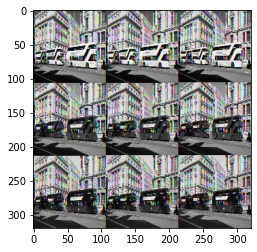

In [23]:
#to print image 
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [24]:
yolo.setInput(blob) 

In [25]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)

In [26]:
#capture bounding boxes 
boxes = []
confidences = []
class_ids =[]

width = 1
height =1


for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7 :
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [27]:
len(boxes)

0

In [29]:
indexes = cv2.dnn.NMSBoxes(boxes , confidences , 0.5,0.4) 

In [30]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [32]:
if len(indexes) > 0:
    for i in indexes.flatten():
      x,y,w,h = boxes[i] 

      label = str(classes[class_ids[i]])
      confi = str(round(confidences[i],2))
      color = colors[i]

      cv2.rectangle(img , (x,y) , (x+w , y+h) , color , 2)
      cv2.putText(img , label + " " + confi , (x,y+20) , font , 2 , (255,255,255) , 2 )

In [33]:
len(boxes)

0

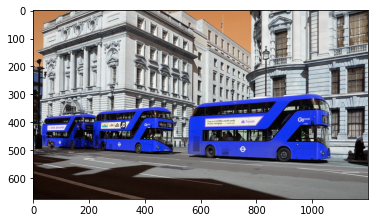

In [34]:
plt.imshow(img)

In [126]:
cv2.imwrite("./img.jpg" , img)

True